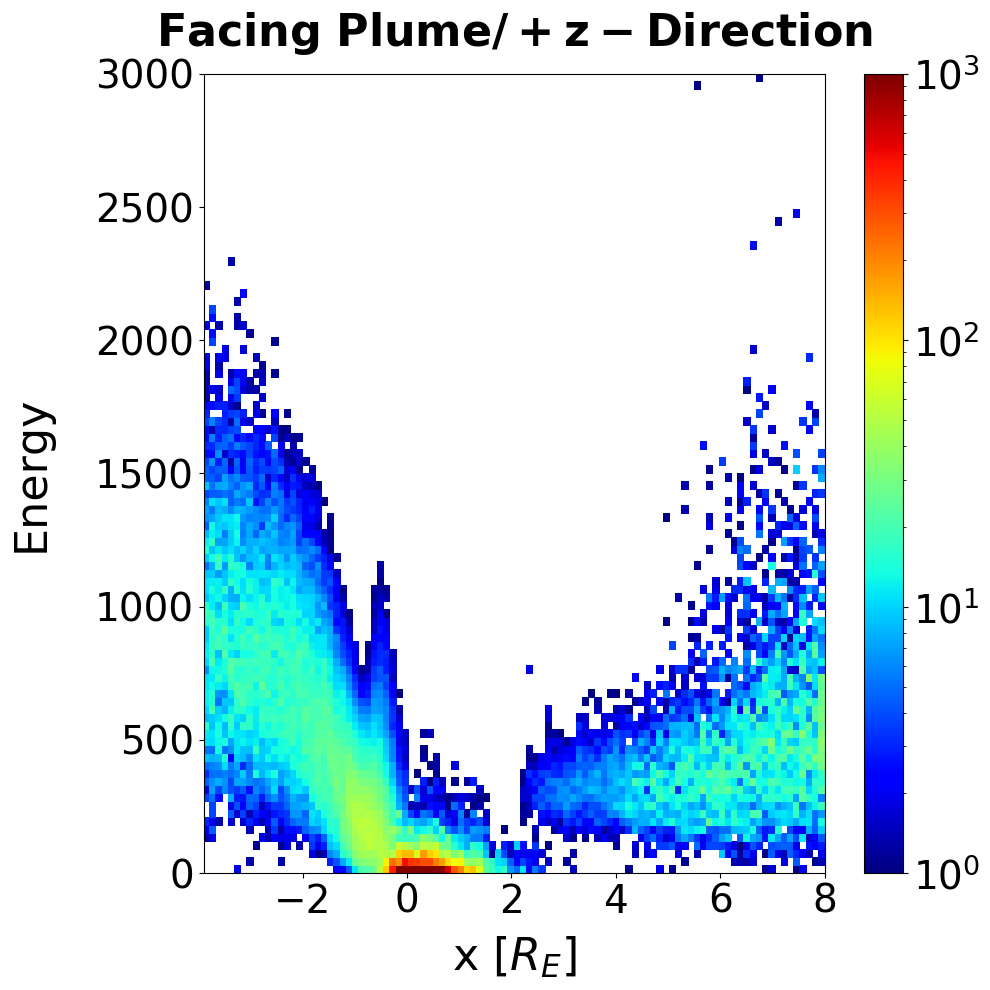

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[1]:36
└ @ Core In[1]:36
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[1]:36
└ @ Core In[1]:36


In [1]:
using PyPlot
using Printf
using DelimitedFiles
using Base

t="40000" #timestep of raw data
JtoEV=1.602176634e-19 #Joule to eV
SI_m0 = [18.5,32,18]*1.672631e-27 #mass species

#fontsize
fontsl=32
fontss=28
xpads=10
ypads=30
pads=20


figure(1,figsize=(10,10))
#reading data
cd("/data2/europaplumes/particle2020_south_v/data/particle_detector/") 
aikef=readdlm(@sprintf("detector1T_TL0%s.txt",t))

#calculating the particle energy and storing it into aikef[:,11]
for i in 1:size(aikef[:,1],1)
               #mass, normalized to SI           speed (v^2)                             conv to eV
    aikef[i,11]=SI_m0[trunc(Int,aikef[i,13])+1]*(aikef[i,10]^2+aikef[i,9]^2+aikef[i,8]^2)*0.5/JtoEV
end
aikefnew=zeros(size(aikef[:,1],1),size(aikef[1,:],1))
for i in 1:size(aikef[:,1],1)
    if aikef[i,10]<0
        aikefnew[i,:]=aikef[i,:]'
    end
end

#binsize for hist plot
xbins=100
ybins=100

#      trajectory    energy                             color     weighted with density                                                  x-range           y-range    color bar         
hist2D(aikefnew[:,1],aikefnew[:,11],bins=[xbins,ybins],cmap="jet",weights=aikefnew[:,12,]*60,norm=matplotlib[:colors][:LogNorm](),cmin=1,range=[[-3.9, 8], [0, 3000]],vmin=1,vmax=1e3) 

#formatting the subplot
rc("font", family="sans-serif", weight="normal") #using Latex fonts
c=colorbar()
c.ax.tick_params(labelsize=fontss)
title(L"$\bf Facing$ $\bf Plume/+z-Direction$",fontsize=fontsl,pad=pads)
xlabel(L"x [$R_E$]",fontsize=fontsl,labelpad=xpads)
xticks(size=fontss)
ylabel("Energy",fontsize=fontsl,labelpad=ypads)
yticks(size=fontss)
tight_layout()
cd("$(homedir())/Desktop/particle_detector/")
savefig("south1T.png")